# A304_SRO_NGO_Hall_10K_p1T_to_n1T

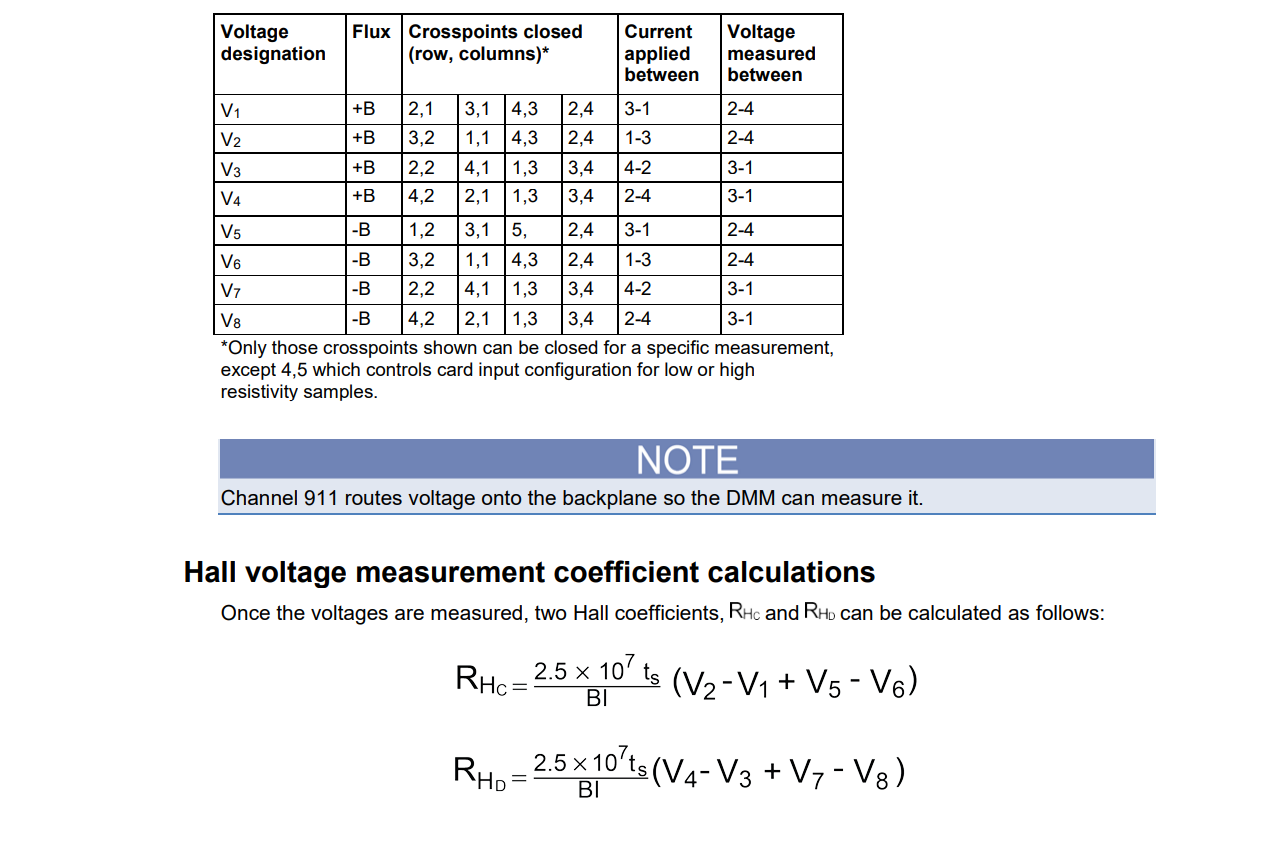

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [139]:
filename='C:\\Users\\Admin\\Desktop\\Data\\6_june_2023\\A304_SRO_NGO_Hall_10K_p1T_n1T.csv'
df = pd.read_csv(filename, names=["I", "B","T", "V1", "V2", "V3", "V4",'Rel_value'])
df['multiplier'] = 10**6
df
# NEED TO ADD MULITPLIER IN THE LABVIEW CODE

,I,B,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.262695,9.999830,108.216856,-108.215627,-195.733560,195.770119,1.077000e-07,1000000
1,0.001,9000.520605,9.999998,109.425088,-109.415351,-195.502276,195.552103,9.340000e-08,1000000
2,0.001,8000.418164,9.999984,110.627796,-110.631289,-195.233594,195.286049,1.006000e-07,1000000
3,0.001,7000.565649,9.999980,111.830515,-111.817695,-195.016369,195.055690,8.580000e-08,1000000
4,0.001,6000.370142,9.999965,113.041001,-113.035804,-194.778693,194.812980,7.680000e-08,1000000
...,...,...,...,...,...,...,...,...,...
61,0.001,6000.255811,10.000179,149.563728,-148.998061,-162.029248,162.280962,-4.650000e-08,1000000
62,0.001,7000.461865,10.000056,120.665896,-120.511859,-186.545046,186.663095,-5.460000e-08,1000000
63,0.001,8000.302930,10.000070,112.694991,-112.649780,-193.079601,193.142338,-6.470000e-08,1000000
64,0.001,9000.415039,10.000134,109.907245,-109.891942,-194.840468,194.897824,-5.520000e-08,1000000


In [140]:
df['V1'] = -1*df['V1']
df['V2'] = -1*df['V2']
df['V3'] = -1*df['V3']
df['V4'] = -1*df['V4']

### Converting B to integer B

In [141]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B', 'B_int', 'T', 'V1', 'V2', 'V3', 'V4', 'Rel_value', 'multiplier']].copy()

In [142]:
df.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.262695,10000,9.999830,-108.216856,108.215627,195.733560,-195.770119,1.077000e-07,1000000
1,0.001,9000.520605,9000,9.999998,-109.425088,109.415351,195.502276,-195.552103,9.340000e-08,1000000
2,0.001,8000.418164,8000,9.999984,-110.627796,110.631289,195.233594,-195.286049,1.006000e-07,1000000
3,0.001,7000.565649,7000,9.999980,-111.830515,111.817695,195.016369,-195.055690,8.580000e-08,1000000
4,0.001,6000.370142,6000,9.999965,-113.041001,113.035804,194.778693,-194.812980,7.680000e-08,1000000


In [143]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

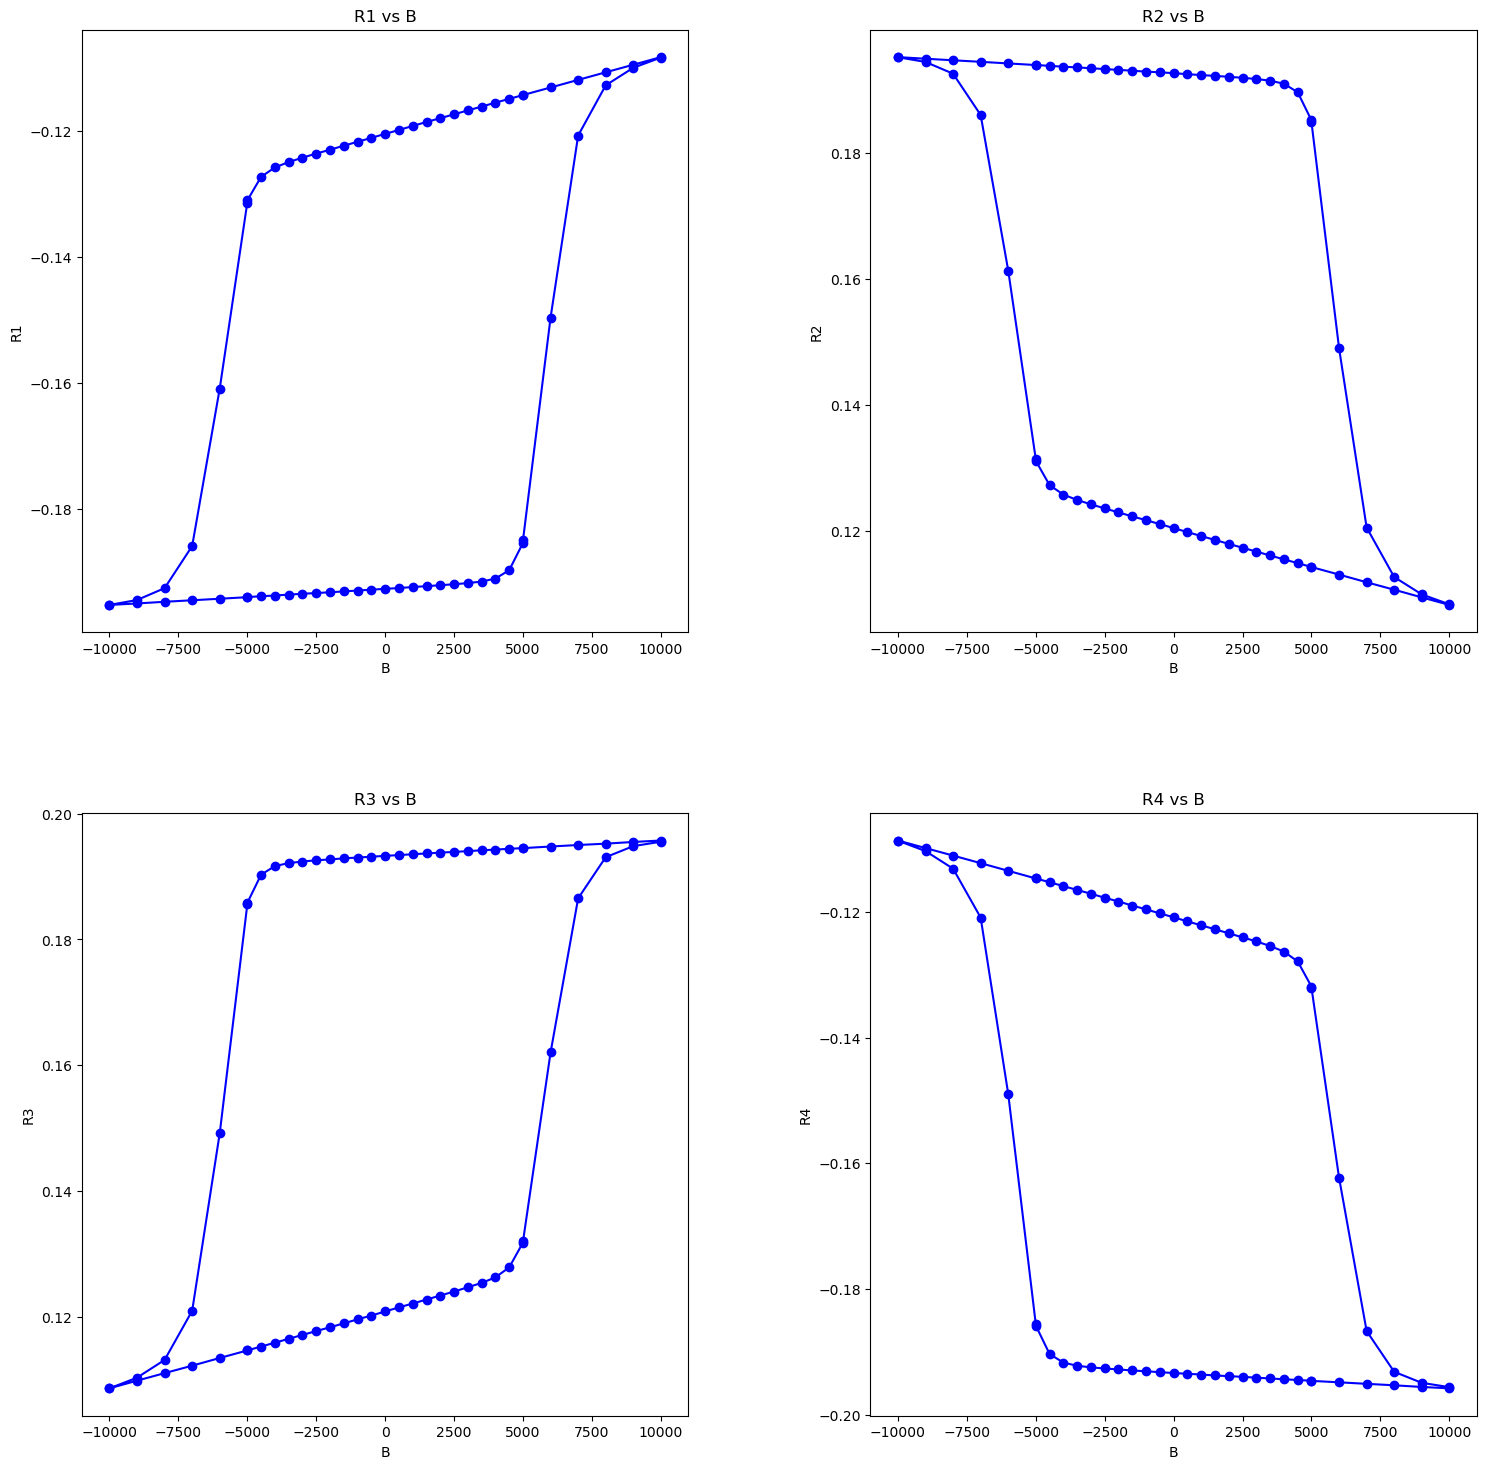

In [144]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [145]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

10000 -10000


In [146]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

32

In [147]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [148]:
df_dec.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.262695,10000,9.999830,-108.216856,108.215627,195.733560,-195.770119,1.077000e-07,1000000
1,0.001,9000.520605,9000,9.999998,-109.425088,109.415351,195.502276,-195.552103,9.340000e-08,1000000
2,0.001,8000.418164,8000,9.999984,-110.627796,110.631289,195.233594,-195.286049,1.006000e-07,1000000
3,0.001,7000.565649,7000,9.999980,-111.830515,111.817695,195.016369,-195.055690,8.580000e-08,1000000
4,0.001,6000.370142,6000,9.999965,-113.041001,113.035804,194.778693,-194.812980,7.680000e-08,1000000


In [149]:
df_inc.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
33,0.001,-10000.272461,-10000,10.000064,-195.204691,195.213334,108.628928,-108.670971,4.470000e-08,1000000
34,0.001,-9000.339355,-9000,10.000085,-194.969790,194.956989,109.846968,-109.873635,5.320000e-08,1000000
35,0.001,-8000.386377,-8000,10.000133,-194.702677,194.710438,111.042748,-111.066875,6.690000e-08,1000000
36,0.001,-7000.563135,-7000,10.000023,-194.463112,194.466653,112.230380,-112.272810,5.560000e-08,1000000
37,0.001,-6000.341650,-6000,9.999986,-194.219296,194.209903,113.450070,-113.489619,5.070000e-08,1000000


In [150]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [151]:
data = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data = data[data['B_int_x'] == -1*data['B_int_y']] # selecting 
data = data[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data.reset_index(inplace = True, drop = True) # resetting index
data.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.001,10000,9.999830,-108.216856,108.215627,195.733560,-195.770119,-195.204691,195.213334,108.628928,-108.670971,1000000
1,0.001,9000,9.999998,-109.425088,109.415351,195.502276,-195.552103,-194.969790,194.956989,109.846968,-109.873635,1000000
2,0.001,8000,9.999984,-110.627796,110.631289,195.233594,-195.286049,-194.702677,194.710438,111.042748,-111.066875,1000000
3,0.001,7000,9.999980,-111.830515,111.817695,195.016369,-195.055690,-194.463112,194.466653,112.230380,-112.272810,1000000
4,0.001,6000,9.999965,-113.041001,113.035804,194.778693,-194.812980,-194.219296,194.209903,113.450070,-113.489619,1000000


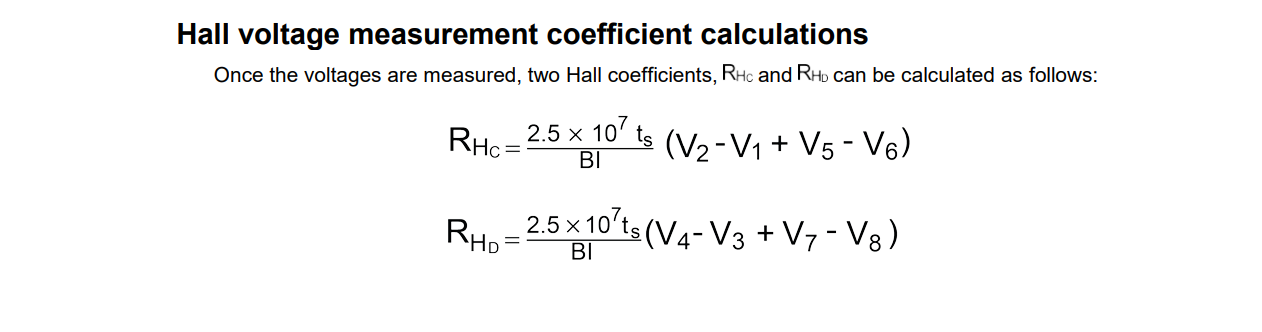
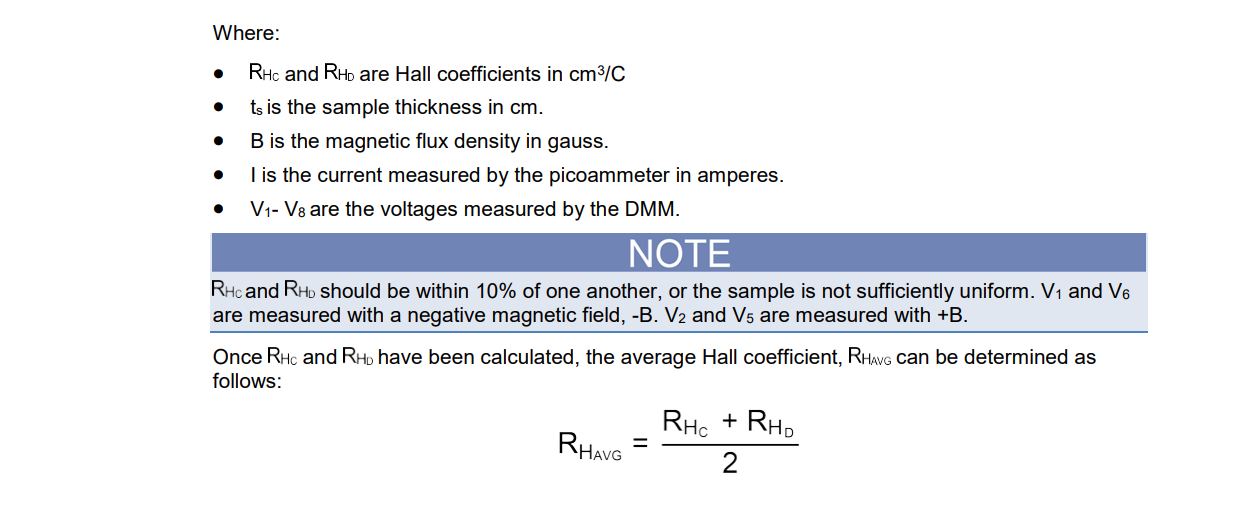

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [152]:
data['RHc'] = (data['V2'] - data['V1'] + data['V5'] - data['V6'])/(data['I']*data['multiplier'])
data['RHd'] = (data['V4'] - data['V3'] + data['V7'] - data['V8'])/(data['I']*data['multiplier'])
data['R'] = (data['RHc'] + data['RHd'])/2

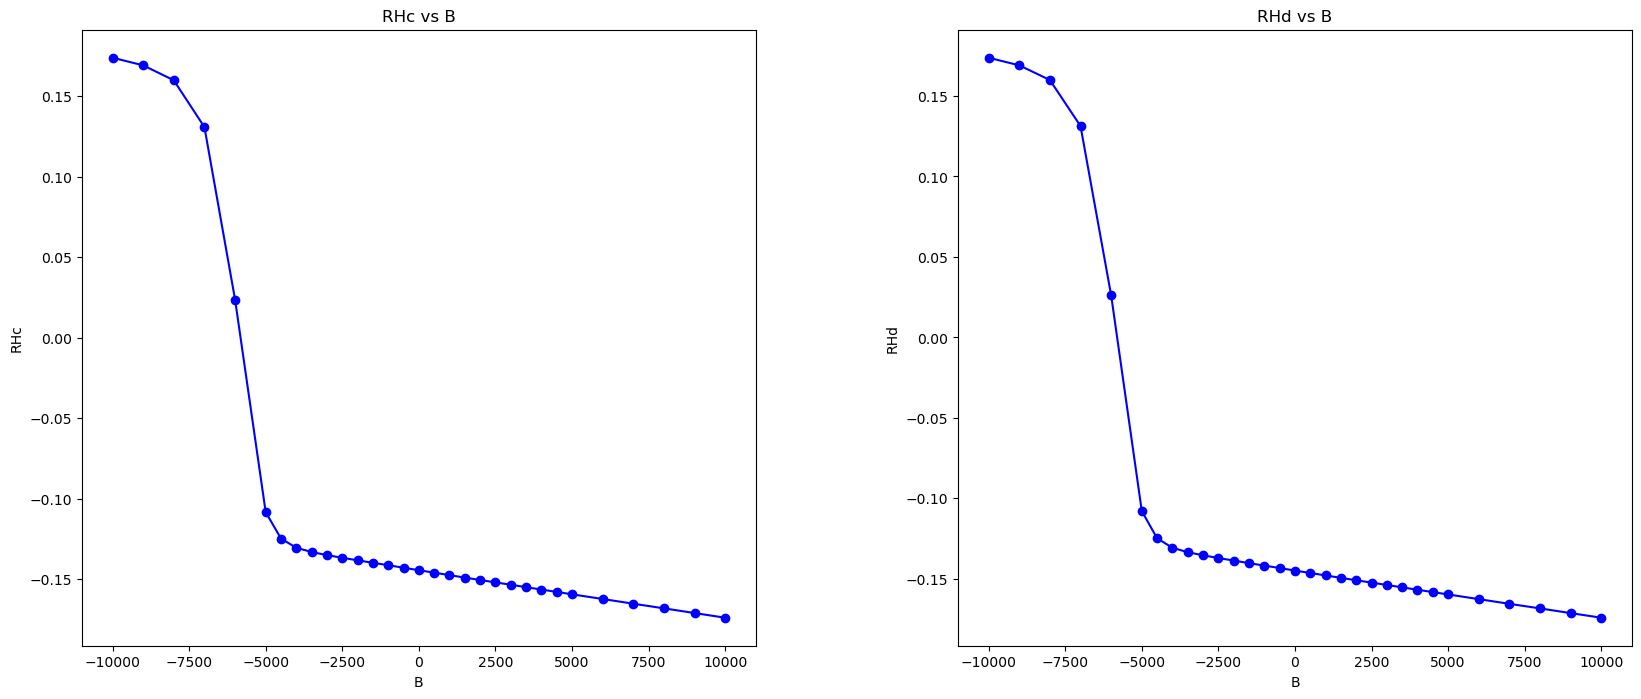

In [153]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data['B'],data['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data['B'],data['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

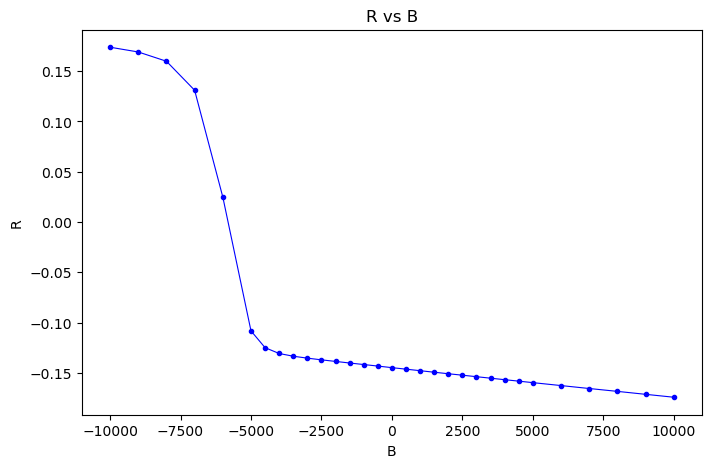

In [154]:
plt.figure(figsize=(8,5))
plt.plot(data['B'],data['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Creating Increasing Field data

In [155]:
data2 = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data2 = data2[data2['B_int_x'] == -1*data2['B_int_y']] # selecting 
data2 = data2[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data2.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data2.reset_index(inplace = True, drop = True) # resetting index
data2.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.001,-10000,10.000064,-195.204691,195.213334,108.628928,-108.670971,-108.216856,108.215627,195.733560,-195.770119,1000000
1,0.001,-9000,10.000085,-194.969790,194.956989,109.846968,-109.873635,-109.425088,109.415351,195.502276,-195.552103,1000000
2,0.001,-8000,10.000133,-194.702677,194.710438,111.042748,-111.066875,-110.627796,110.631289,195.233594,-195.286049,1000000
3,0.001,-7000,10.000023,-194.463112,194.466653,112.230380,-112.272810,-111.830515,111.817695,195.016369,-195.055690,1000000
4,0.001,-6000,9.999986,-194.219296,194.209903,113.450070,-113.489619,-113.041001,113.035804,194.778693,-194.812980,1000000


### Hall resistance calculation

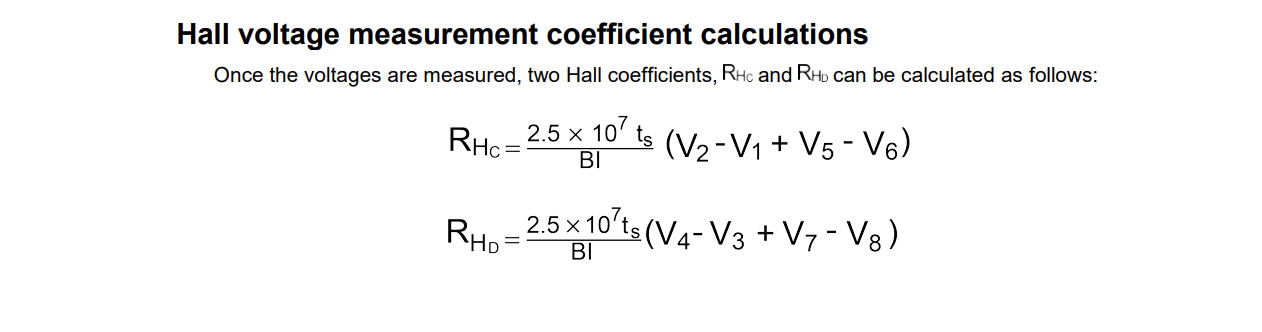

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [156]:
data2['RHc'] = (data2['V2'] - data2['V1'] + data2['V5'] - data2['V6'])/(data2['I']*data2['multiplier'])
data2['RHd'] = (data2['V4'] - data2['V3'] + data2['V7'] - data2['V8'])/(data2['I']*data2['multiplier'])

data2['R'] = (data2['RHc'] + data2['RHd'])/2

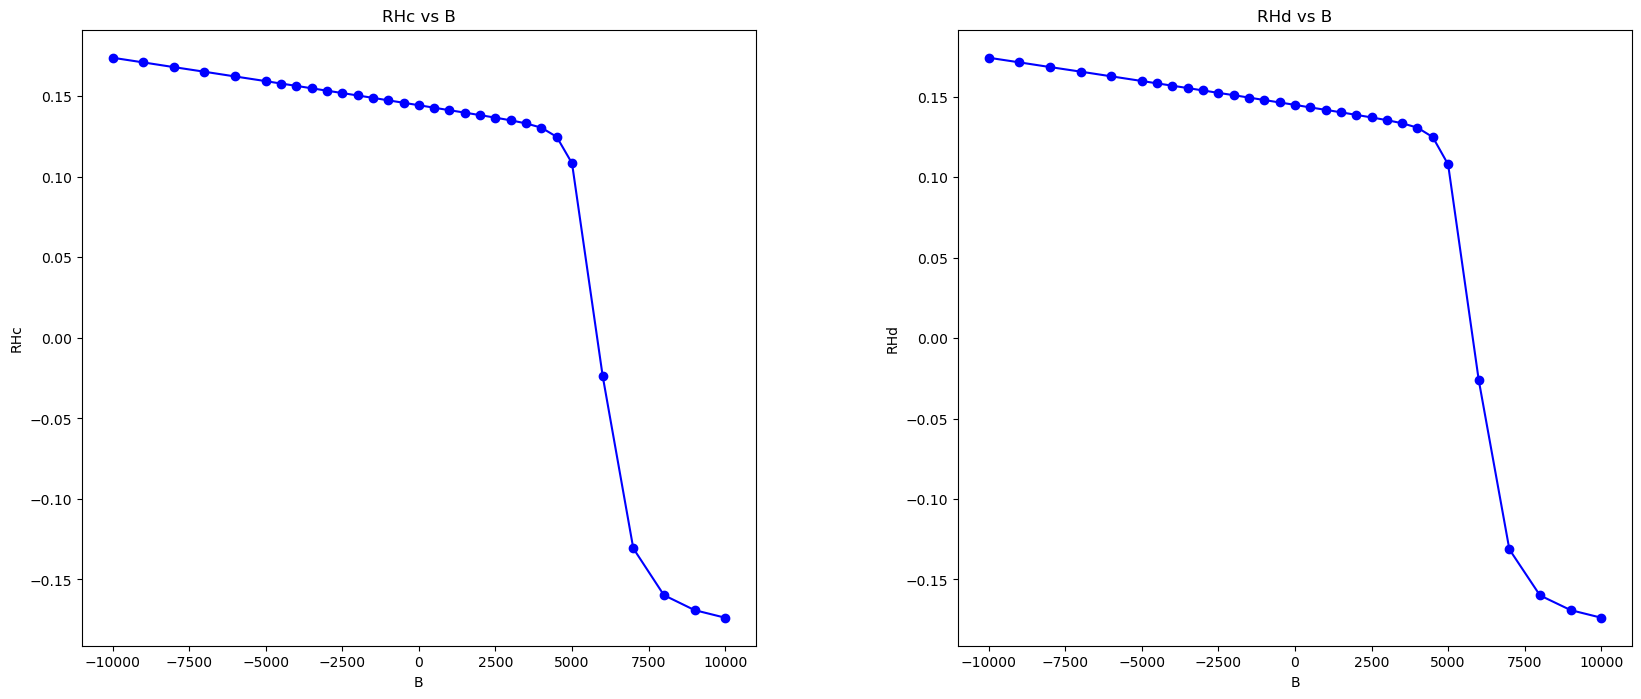

In [157]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data2['B'],data2['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data2['B'],data2['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

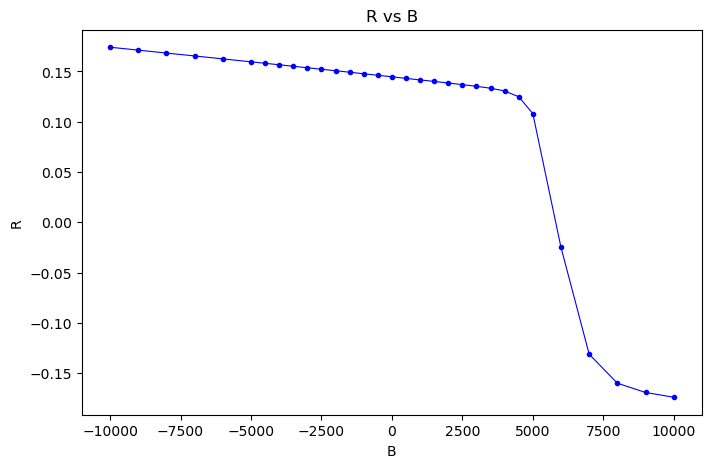

In [158]:
plt.figure(figsize=(8,5))
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

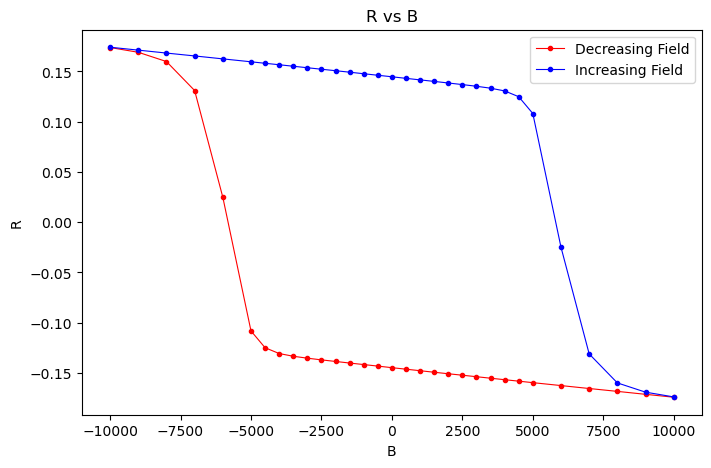

In [159]:
plt.figure(figsize=(8,5))
plt.plot(data['B'], data['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()